<a href="https://colab.research.google.com/github/badmirohan01/ML-Lab-Programs/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving enjoysport.csv.xlsx to enjoysport.csv.xlsx


In [ ]:
import pandas as pd
import numpy as np

# Upload the file using files.upload() if it's not already in Colab environment
# from google.colab import files
# uploaded = files.upload()

data = pd.DataFrame(data=pd.read_excel('enjoysport.csv.xlsx'))  # Use pd.read_excel()
print(data)

concepts = np.array(data.iloc[:,0:-1])
print(concepts)

target = np.array(data.iloc[:,-1])
print(target)

def learn(concepts,target):
  specific_h = concepts[0].copy()
  print("\nInitialization of specific_h and general_h")
  print(specific_h)

  general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
  print(general_h)

  for i,h in enumerate(concepts):
    if target[i] == 'yes':
      for x in range(len(specific_h)):
        if h[x] != specific_h[x]:
          specific_h[x] = "?"
          general_h[x][x] = "?"

    if target[i] == 'no':
      for x in range(len(specific_h)):
        if h[x] != specific_h[x]:
          general_h[x][x] = specific_h[x]
        else:
          general_h[x][x] = "?"

    print("\nSteps of candidate elimination algorithm:",i+1)
    print(specific_h)
    print(general_h)

  indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
  # print(indices)
  for i in indices:
    general_h.remove(['?', '?', '?', '?', '?', '?'])

  return specific_h,general_h

s_final,g_final = learn(concepts,target)
print("\n Final Specific Hypothesis:",s_final)
print("\n Final General Hypothesis:",g_final)

     sky airtemp humidity    wind water forcast enjoysport
0  sunny    warm   normal  strong  warm    same        yes
1  sunny    warm     high  strong  warm    same        yes
2  rainy    cold     high  strong  warm  change         no
3  sunny    warm     high  strong  cool  change        yes
[['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]
['yes' 'yes' 'no' 'yes']

Initialization of specific_h and general_h
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of candidate elimination algorithm: 1
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?'

In [ ]:
import heapq
grid_size = 10
grid = [[0 for _ in range(grid_size)]for _ in range(grid_size)]
start = (0,0)
goal = (grid_size-1, grid_size-1)

def heuristic(node,goal):
  return abs(node[0]-goal[0] + abs(node[1]-goal[1]))

def astar(grid,start,goal):
  open_list = []
  closed_list = set()

  cost = {start:0}
  prev_node = {start:None}
  heapq.heappush(open_list,(0,start))

  while open_list:
    current_cost,current_node = heapq.heappop(open_list)

    if current_node == goal:
      path = []
      while current_node is not None:
        path.append(current_node)
        current_node = prev_node[current_node]
      return path[::-1]
    closed_list.add(current_node)

    for dx,dy in [(-1,0),(1,0),(0,-1),(0,1)]:
      neighbor = (current_node[0]+dx , current_node[1]+dy)
      if 0<=neighbor[0]<grid_size and 0<=neighbor[1]<grid_size:
        if grid[neighbor[0]][neighbor[1]] == 0 and neighbor not in closed_list:
          neighbor_cost = cost[current_node]+1
          if neighbor not in cost or neighbor_cost > cost[neighbor]:
            cost[neighbor] = neighbor_cost
            prev_node[neighbor] = current_node
            heapq.heappush(open_list,(neighbor_cost+heuristic(neighbor,goal),neighbor))

  return None

path = astar(grid,start,goal)
if path is not None:
  print("\nPath found:",path)
else:
  print("\nPath not found")


Path found: [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4), (4, 5), (5, 5), (5, 6), (6, 6), (6, 7), (7, 7), (7, 8), (8, 8), (8, 9), (9, 9)]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

hours_studied = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
exam_score = np.array([40, 50, 60, 70, 80, 90, 100, 110, 120, 130])

X_train,X_test,y_train,y_test = train_test_split(hours_studied.reshape(-1,1),exam_score,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"MSE:{mse}")
print(f"r2 Score:{r2}")

MSE:0.0
r2 Score:1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

learning_rate = 0.1
num_iterations = 1000

weights = np.random.rand(2)
bias = np.random.rand(1)

for i in range(num_iterations):
  output = np.dot(X, weights) + bias
  output = np.where(output>0,1,0)
  error = y-output
  weights += learning_rate*np.dot(X.T,error)
  bias += learning_rate*np.sum(error)

test_X = np.array([[0,0],[0,1],[1,0],[1,1]])
test_output = np.dot(test_X, weights)+bias
test_output = np.where(output>0,1,0)
print(f"test output:{test_output}")

data = {
    "customer_segment":["Gold","Silver","Bronze","Gold","Silver","Bronze"],
    "product_category":["Electronics","Clothing","Food","Home Decor","Clothing","Electronics"],
    "purchase_amount":[50,15,80,30,20,10],
    "promotion_used":["yes","no","no","yes","yes","no"],
    "sales_target":["High", "Medium", "Low", "Medium", "Medium", "Low"]
}

df = pd.DataFrame(data)

df["customer_segment"] = pd.Categorical(df["customer_segment"]).codes
df["product_category"] = pd.Categorical(df["product_category"]).codes
df["promotion_used"] = pd.Categorical(df["promotion_used"]).codes

X = df[["customer_segment","product_category","purchase_amount","promotion_used"]]
y = df["sales_target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(classification_report(y_test, y_pred))

test output:[0 0 0 0]
Accuracy:0.5
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
      Medium       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Accuracy:1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf = AdaBoostClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Accuracy:0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Text(0.5, 1.0, 'GMM Classification')

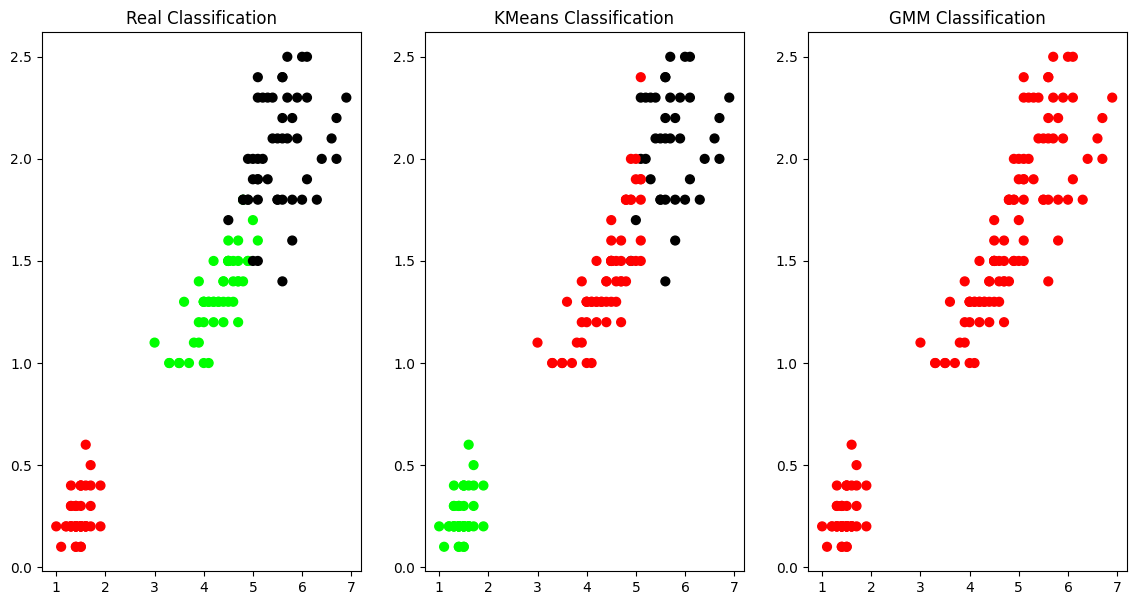

In [10]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = load_iris()
X = pd.DataFrame(dataset.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(dataset.target)
y.columns = ['Targets']

plt.figure(figsize=(14,7))
colormap = np.array(['red','lime','black'])

#Plotting real class
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

#Plotting KMeans
plt.subplot(1,3,2)
model = KMeans(n_clusters=3)
model.fit(X)
predy = np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[predy], s=40)
plt.title('KMeans Classification')

#Standardising features for GMM
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
gmm = GaussianMixture()
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')

# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)
